In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KernelDensity
from scipy import stats

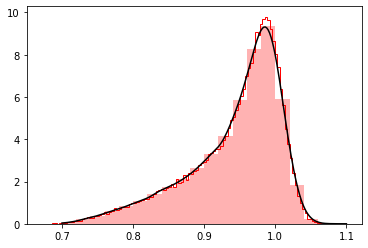

In [3]:
Mirr = lambda chi, M : M * np.sqrt(0.5 + 0.5*np.sqrt(1-chi**2))
f = lambda chi: np.sqrt(0.5 + 0.5*np.sqrt(1-chi**2))

### PLOT f(chi), plt.hist(mass)
N = 100000; mu = 1; sigma=0.02
rvs_chi = stats.uniform(0, 1).rvs(N)
rvs_M   = stats.norm(mu, sigma).rvs(N)

rvs_Mirr= np.array( Mirr(rvs_chi, rvs_M) )

plt.hist(rvs_Mirr, bins=np.arange(0.7, 1.1, 0.02), 
         density=True, facecolor='red', alpha=0.3)

from astropy.visualization.hist import hist as fancyhist
values, edges, _ = fancyhist(rvs_Mirr, bins='freedman', histtype='step', density=True, edgecolor='red')

KDE = KernelDensity(kernel='gaussian', bandwidth=0.008).fit(rvs_Mirr.reshape(-1,1))
x = np.arange(0.7, 1.1, 0.002)
y = np.exp( KDE.score_samples(x.reshape(-1,1)) )

plt.plot(x,y, c='k')
### ADD Legend and Labels
### Note: OPERATING WITH SAMPLES IS BETTER THAN WORKING WITH PDFs!
### ADD Semi-Analytical Integral!

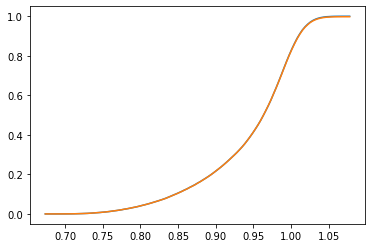

In [4]:
values, edges, _ = fancyhist(rvs_Mirr, bins='freedman', histtype='step', density=False, edgecolor='red')
plt.clf()
centers = 0.5 * (edges[1:]+edges[:-1])

cdf_Mirr = [np.sum(values[:i])/np.sum(values) for i in range(len(values))]
plt.plot(centers, cdf_Mirr)
cdf_f = [np.sum(values[:i]/rvs_M[:i])/np.sum(values) for i in range(len(values))]
plt.plot(centers, cdf_f)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  6.76it/s]
<ipython-input-5-0276c6a16a24>:35: RuntimeWarning: invalid value encountered in sqrt
  pdf_f = lambda f: 2 * (2*f*f -1)/np.sqrt(1-f*f)


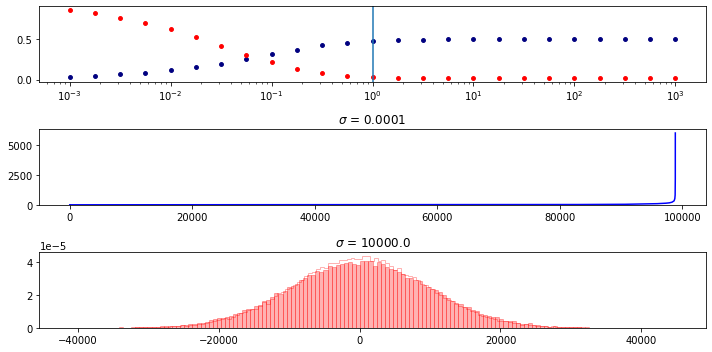

In [5]:
### Fix this part!
from tqdm import tqdm
fig, axs = plt.subplots(3,1, tight_layout=True, figsize=(10,5))
for sigma in tqdm( np.logspace(-3, 3, 25) ):
    #N = 100000; #mu = 1; #sigma=0.02
    rvs_chi = stats.uniform(0, 1).rvs(N)
    rvs_M   = stats.norm(mu, sigma).rvs(N)    
    rvs_Mirr= np.array( Mirr(rvs_chi, rvs_M) )
    rvs_f   = np.array( f(rvs_chi) )
    
    KS = stats.ks_2samp(rvs_Mirr, rvs_f)
    axs[0].scatter(sigma, KS.statistic, s=15, c='navy')

    KS = stats.ks_2samp(rvs_Mirr, rvs_M)
    axs[0].scatter(sigma, KS.statistic, s=15, c='red')

axs[0].set_xscale('log')
axs[0].axvline(mu)

for sigma, col, i in zip([1e-4, 1e4], ['navy', 'red'], [1,2]):
    rvs_chi = stats.uniform(0, 1).rvs(N)
    rvs_M   = stats.norm(mu, sigma).rvs(N)    
    rvs_Mirr= np.array( Mirr(rvs_chi, rvs_M) )
    rvs_f   = np.array( f(rvs_chi) )

    kw = {'facecolor':col, 'edgecolor':col, 'alpha':0.3, 'ax':axs[i], 'density':True, 'label':r'\sigma ='+str(sigma)}
    fancyhist(rvs_Mirr, bins='freedman', **kw, histtype='step')
    if i == 1: 
        fancyhist(rvs_f   , bins='freedman', **kw)
        # axs[i].set_xlim([-0.1, 100000])
    if i == 2: 
        fancyhist(rvs_M   , bins='freedman', **kw)
    axs[i].set_title(r'$\sigma$ = ' + str(sigma))
    xf = np.linspace(0.7, 1.1, 199)
    pdf_f = lambda f: 2 * (2*f*f -1)/np.sqrt(1-f*f)
    if i == 1:
        axs[i].plot(pdf_f(np.sort(rvs_Mirr)), c='blue')

In [6]:
### Check distribution order (punto 6)

### Fare punto 7